In [1]:


import pandas as pd
import numpy as np
import pandas_profiling as pf

df = pd.read_csv('./Data/SIGMOID_training_data.csv', index_col='url_id')

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
from xgboost.sklearn import XGBRegressor

In [3]:
df.columns = df.columns.str.strip()

In [147]:
Y = df.shares
X = df.drop(['shares'], axis =1)

In [87]:
correlate_columns = ['kw_max_min' , 'kw_max_avg', 'kw_min_min','kw_min_max',
              'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_self_hrefs',
              'weekday_is_saturday', 'weekday_is_sunday','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
              'global_sentiment_polarity', 'global_rate_positive_words','rate_negative_words', 'max_positive_polarity','min_negative_polarity','title_subjectivity']

In [88]:
X = X.drop(correlate_columns, axis=1)
print(X.shape, Y.shape)

(28786, 36) (28786,)


In [ ]:
# pf.ProfileReport(X)

In [ ]:
X.describe()

In [ ]:
X[['kw_max_min' , 'kw_max_avg', 'kw_min_min','kw_min_max',
              'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_self_hrefs',
              ]].describe()

In [ ]:
normalizeColumns = ['timedelta', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_avg_min', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 
        'kw_max_min' , 'kw_max_avg', 'kw_min_min','kw_min_max',
              'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_self_hrefs',
       ]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=77)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
std =StandardScaler()
Mms = MinMaxScaler()
# X_train[normalizeColumns] = std.fit_transform(X_train[normalizeColumns])
X = std.fit_transform(X)



# X_test[normalizeColumns] = std.transform(X_test[normalizeColumns])


In [ ]:
X_train.describe()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler,StandardScaler,Normalizer
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [137]:
## Evaluation metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [138]:
from sklearn.metrics import make_scorer
mape = make_scorer(mean_absolute_percentage_error)

In [184]:
from sklearn import linear_model, svm, tree, ensemble

models = [
#     linear_model.Ridge(),
#     linear_model.Lasso(),
#     linear_model.ElasticNet(),
#     linear_model.BayesianRidge(),
# linear_model.SGDRegressor(),
#     svm.LinearSVR(max_iter=2000, C= .0623,epsilon=.5),#loss='squared_epsilon_insensitive',dual=True,),
#     XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200), #objective= mean_absolute_percentage_error),
#         XGBRegressor(random_state=10,booster='dart',reg_lambda=2,n_estimators=200),
#             XGBRegressor(random_state=10,booster='gbtree',reg_lambda=2,n_estimators=200),
        XGBRegressor(random_state=10,booster='gbtree',n_jobs=4,learning_rate=1.4,
                     n_estimators=100,max_depth=7,
                     reg_lambda=3,reg_alpha=1, 
                     colsample_bytree=0.7,feature_selector='cyclic')
#         XGBRegressor(random_state=10,booster='gbtree',learning_rate=1,reg_lambda=2,n_estimators=400),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),
#         XGBRegressor(random_state=10,booster='gblinear',reg_lambda=2,n_estimators=200),


#     svm.SVR(kernel='linear',C= .060023),   
#     linear_model.LinearRegression(),
#     linear_model.RANSACRegressor(),
#     tree.DecisionTreeRegressor(),
#     tree.ExtraTreeRegressor(),
#     ensemble.RandomForestRegressor(),
#     ensemble.GradientBoostingRegressor(),
#     ensemble.AdaBoostRegressor()

]

In [185]:
# checking mean absolute percentage error - testing values of c for svrt
for model in models:
    
    model.fit(X_train,Y_train, eval_metric="error", eval_set=[(X_test,Y_test)], verbose=True)
    print('-'*30)
    print(model)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))

[0]	validation_0-error:-3375.03
[1]	validation_0-error:-3329.08
[2]	validation_0-error:-3301.35
[3]	validation_0-error:-3173.93
[4]	validation_0-error:-3109.96
[5]	validation_0-error:-2995.54
[6]	validation_0-error:-2841.53
[7]	validation_0-error:-2742.22
[8]	validation_0-error:-2716.51
[9]	validation_0-error:-2701.53
[10]	validation_0-error:-2684.9
[11]	validation_0-error:-2654.53
[12]	validation_0-error:-2642.58
[13]	validation_0-error:-2583.49
[14]	validation_0-error:-2557.13
[15]	validation_0-error:-2551.46
[16]	validation_0-error:-2553.35
[17]	validation_0-error:-2458.26
[18]	validation_0-error:-2385.66
[19]	validation_0-error:-2390.17
[20]	validation_0-error:-2393.86
[21]	validation_0-error:-2408.16
[22]	validation_0-error:-2373.55
[23]	validation_0-error:-2266.77
[24]	validation_0-error:-2219.84
[25]	validation_0-error:-2198.78
[26]	validation_0-error:-2157.23
[27]	validation_0-error:-2114.77
[28]	validation_0-error:-2119.55
[29]	validation_0-error:-2004.4
[30]	validation_0-erro

In [ ]:
# checking mean absolute percentage error - testing values of c for svrt
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))

In [ ]:
from sklearn import linear_model, svm, tree, ensemble

models = [
#     linear_model.Ridge(),
#     linear_model.Lasso(),
#     linear_model.ElasticNet(),
#     linear_model.BayesianRidge(),
# linear_model.SGDRegressor(),
#     svm.LinearSVR(),
#     gammas = [0.001, 0.01, 0.1, 1]
    svm.SVR(),
        svm.SVR(C = 0.5,gamma=0.001),

        svm.SVR(C= 0.3,gamma=0.01),

        svm.SVR(C = 0.03,gamma=1),

        svm.SVR(C = 2),
            svm.SVR(C = 3,gamma=4),
        svm.SVR(C = 5,gamma=5),
        svm.SVR(C = 8,gamma=8),
        svm.SVR(C = 10,gamma=100),
        svm.SVR(C = 15,gamma=20),
        svm.SVR(C = 17,gamma=20),
        svm.SVR(C = 20,gamma=200),


    
    
#     linear_model.LinearRegression(),
#     linear_model.RANSACRegressor(),
#     tree.DecisionTreeRegressor(),
#     tree.ExtraTreeRegressor(),
#     ensemble.RandomForestRegressor(),
#     ensemble.GradientBoostingRegressor(),
#     ensemble.AdaBoostRegressor()

]

In [ ]:
# checking mean absolute percentage error - testing values of c for svrt
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))

In [ ]:
# checking mean absolute percentage error - standardize normalization and pca
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))

In [ ]:
models[1]

In [ ]:
# checking mean absolute percentage error - standardize normalization
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))

In [ ]:
# checking mean absolute percentage error - Min - Max scaler
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))

#### checking the test dataset

In [ ]:
# test data
test = pd.read_csv('./Data/SIGMOID_test_data.csv',index_col='url_id')
indexes = test.index
test.columns = test.columns.str.strip()

test = test.drop(correlate_columns, axis=1)

test = std.transform(test)

In [ ]:
test.shape

In [ ]:
Y_pred =models[0].predict(test)


In [ ]:
result = pd.concat([pd.Series(indexes, name='url_id'), pd.Series(Y_pred, name='shares')],axis=1)

In [ ]:
result.to_csv('./output/sigmoid_out_LinearSVR_2_cv01_gamma.csv',index=False)

In [ ]:
import xgboost

### Feature analysis and selection

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

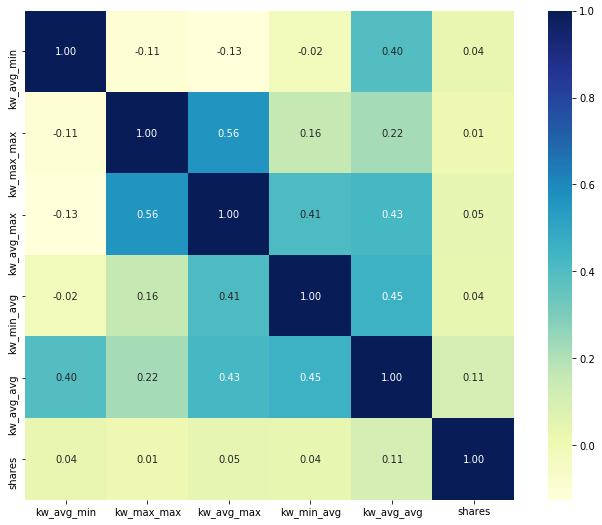

In [10]:
# correlation matrix
cols = [  'kw_avg_min', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg','shares']
corrmat = df[cols].corr()
# mask = np.zeros_like(corrmat, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (12,9))
g = sns.heatmap(corrmat, square=True,annot=True,fmt=".2f",cmap='YlGnBu')

In [11]:
# drop 'kw_max_min' , 'kw_max_avg',
# 'kw_min_min',  drop needs to be explored further
# ,'kw_min_max'

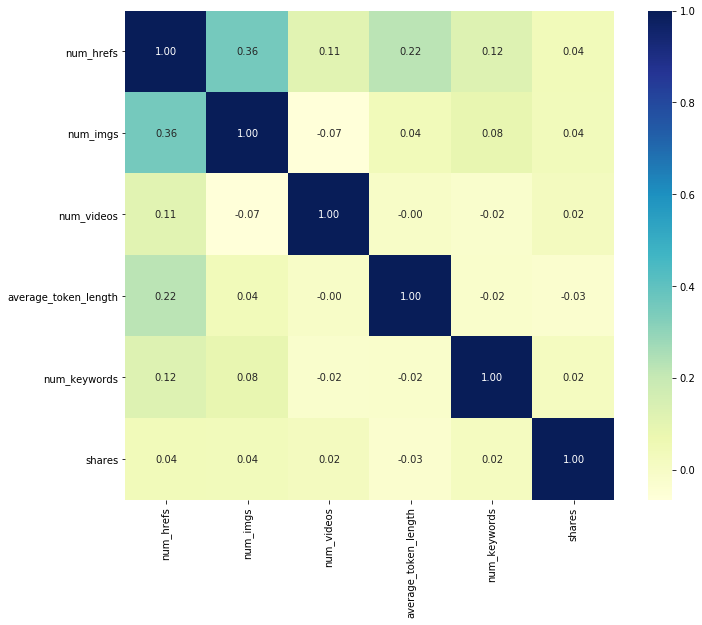

In [12]:
# correlation matrix
cols = ['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords','shares']
corrmat = df[cols].corr()
# mask = np.zeros_like(corrmat, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (12,9))
g = sns.heatmap(corrmat, square=True,annot=True,fmt=".2f",cmap='YlGnBu')
# g.set_yticklabels(rotation=30)
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f",vmax=0.8,

In [13]:
#  drop  'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_self_hrefs',

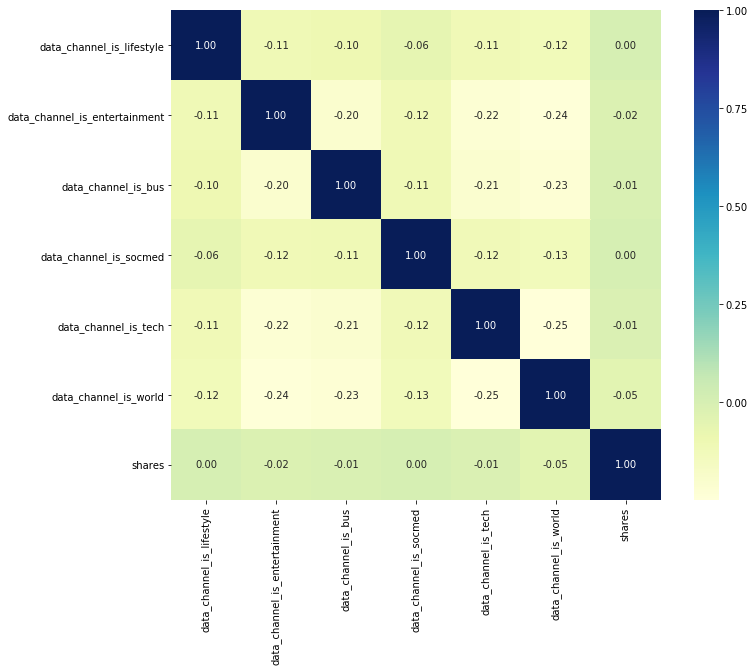

In [14]:
# correlation matrix for data channel
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','shares']
corrmat = df[cols].corr()
# mask = np.zeros_like(corrmat, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (12,9))
g = sns.heatmap(corrmat, square=True,annot=True,fmt=".2f",cmap='YlGnBu')
# g.set_yticklabels(rotation=30)
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f",vmax=0.8,

In [15]:
df.data_channel_is_socmed.value_counts()

0    27097
1     1689
Name: data_channel_is_socmed, dtype: int64

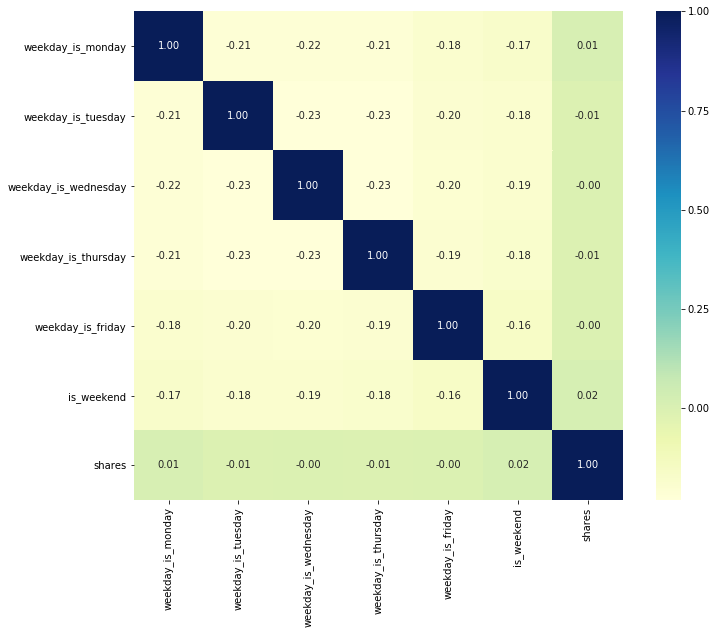

In [16]:
# correlation matrix for day of week 
cols = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
        'is_weekend','shares']
corrmat = df[cols].corr()
# mask = np.zeros_like(corrmat, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (12,9))
g = sns.heatmap(corrmat, square=True,annot=True,fmt=".2f",cmap='YlGnBu')
# g.set_yticklabels(rotation=30)
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f",vmax=0.8,

In [17]:
# drop 'weekday_is_saturday', 'weekday_is_sunday'
# check for drop of 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',

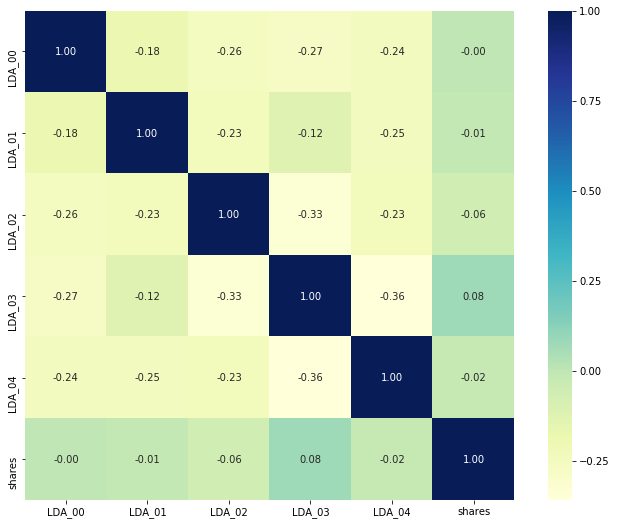

In [18]:
# correlation matrix for day of week 
cols = [ 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04','shares']
corrmat = df[cols].corr()
# mask = np.zeros_like(corrmat, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (12,9))
g = sns.heatmap(corrmat, square=True,annot=True,fmt=".2f",cmap='YlGnBu')
# g.set_yticklabels(rotation=30)
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f",vmax=0.8,

In [19]:
#  'LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',

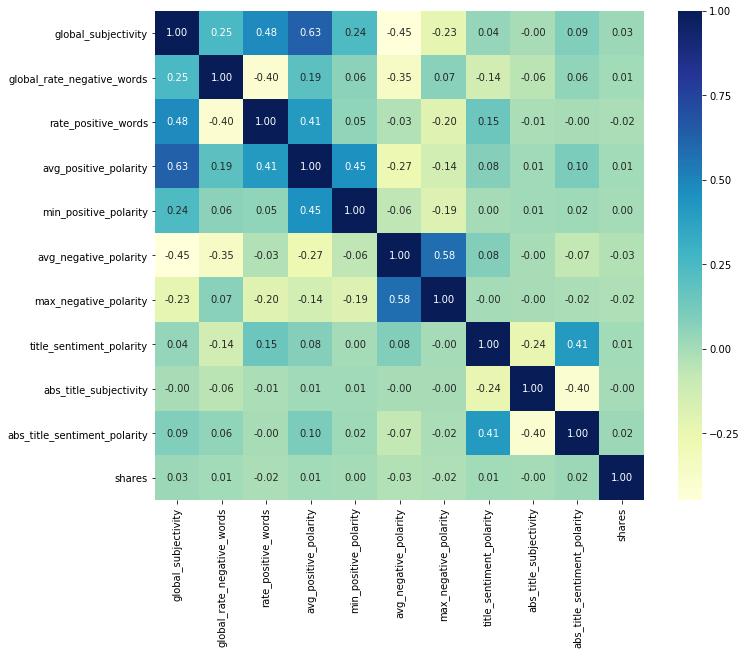

In [20]:
# correlation matrix for remaining
cols = [ 'global_subjectivity',
       'global_rate_negative_words', 'rate_positive_words',
        'avg_positive_polarity', 'min_positive_polarity',
        'avg_negative_polarity',
        'max_negative_polarity', 
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']
corrmat = df[cols].corr()
# mask = np.zeros_like(corrmat, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (12,9))
g = sns.heatmap(corrmat, square=True,annot=True,fmt=".2f",cmap='YlGnBu')
# g.set_yticklabels(rotation=30)
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f",vmax=0.8,

In [21]:
# drop 'global_sentiment_polarity', 'global_rate_positive_words','rate_negative_words', 'max_positive_polarity','min_negative_polarity','title_subjectivity',

### Processing the dataset

In [22]:
X.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.00000,28786.000000,28786.000000
mean,353.520635,10.403460,546.455082,0.555111,1.006600,0.695780,10.873063,3.301674,4.548496,1.259432,4.550483,7.224449,0.053186,0.177691,0.157229,0.058674,0.185681,0.213541,25.917529,1170.187296,313.969191,13741.614431,752845.153894,259488.803305,1119.117710,5661.950910,3136.457660,3959.137988,10180.309566,6328.304836,0.166782,0.186653,0.189224,0.183631,0.144098,0.061905,0.067707,0.129612,0.184370,0.141474,0.216478,0.223049,0.234595,0.443485,0.118936,0.039636,0.016630,0.682098,0.288165,0.353350,0.095110,0.756500,-0.260026,-0.522700,-0.107939,0.282659,0.07220,0.341162,0.156628
std,214.420324,2.121334,470.409467,4.130828,6.138155,3.830214,11.155409,3.868232,8.342588,4.183587,0.842057,1.909620,0.224407,0.382259,0.364023,0.235018,0.388855,0.409814,69.422533,4110.419484,638.580354,58488.942267,213664.134603,135157.683564,1137.505117,6167.654463,1318.413527,19217.142024,39839.079255,23775.239191,0.372788,0.389640,0.391693,0.387190,0.351195,0.240987,0.251246,0.335881,0.263121,0.219639,0.282305,0.294676,0.289643,0.116509,0.096983,0.017406,0.010841,0.190535,0.156808,0.104192,0.070577,0.247865,0.127850,0.290469,0.095253,0.323911,0.26614,0.189085,0.226958
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000
25%,163.000000,9.000000,245.000000,0.470735,1.000000,0.625926,4.000000,1.000000,1.000000,0.000000,4.480429,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,446.250000,141.800000,0.000000,843300.000000,172800.000000,0.000000,3560.441280,2383.855650,637.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025048,0.025014,0.028571,0.028571,0.028574,0.396424,0.057387,0.028398,0.009640,0.600000,0.18518

In [23]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(X[['self_reference_min_shares']])).describe()
# X['self_reference_min_shares'].describe()

,0
count,28786.000000
mean,0.004695
std,0.022788
min,0.000000
25%,0.000755
50%,0.001423
75%,0.003202
max,1.000000


In [24]:
cols = ['self_reference_min_shares', 'self_reference_max_shares','self_reference_avg_sharess', 'num_imgs',
'kw_min_min', 'kw_max_min', 'kw_avg_min','kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg', 
  'timedelta', 'n_tokens_content', 'timedelta','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','n_unique_tokens', 'num_hrefs']

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
std =StandardScaler()
Mms = MinMaxScaler()
X[cols] = std.fit_transform(X[cols])

X[cols].describe()

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,num_imgs,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,timedelta,n_tokens_content,timedelta,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,n_unique_tokens,num_hrefs
count,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04
mean,6.955845e-16,1.135774e-16,-1.442540e-15,-6.176668e-15,-9.366924e-14,-3.763211e-16,-3.626410e-16,6.721845e-15,-1.996201e-14,-3.295421e-15,8.903120e-15,4.030392e-16,4.777978e-16,1.655128e-14,1.507012e-16,1.655128e-14,2.481311e-17,5.022836e-17,-2.744831e-17,2.481311e-17,-7.620899e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.060247e-01,-2.555402e-01,-2.661767e-01,-5.452235e-01,-3.877415e-01,-2.846930e-01,-4.932420e-01,-2.349479e-01,-3.523559e+00,-1.919930e+00,-9.847315e-01,-9.180231e-01,-2.379005e+00,-1.611445e+00,-1.161679e+00,-1.611445e+00,-1.343849e-01,-1.639936e-01,-1.816588e-01,-1.343849e-01,-9.747067e-01
25%,-1.728767e-01,-2.279286e-01,-2.249566e-01,-4.253545e-01,-3.877415e-01,-1.761255e-01,-2.696171e-01,-2.349479e-01,4.233580e-01,-6.414013e-01,-9.838524e-01,-3.407367e-01,-5.708490e-01,-8.885536e-01,-6.408466e-01,-8.885536e-01,-2.042646e-02,-1.075331e-03,-1.823796e-02,-2.042646e-02,-6.161300e-01
50%,-1.435794e-01,-1.827461e-01,-1.736419e-01,-4.253545e-01,-3.877415e-01,-1.238794e-01,-1.227958e-01,-2.110113e-01,4.233580e-01,-1.073450e-01,-8.087375e-02,-2.127289e-01,-2.039480e-01,-7.704924e-02,-2.900823e-01,-7.704924e-02,-3.827231e-03,-1.075330e-03,-1.236662e-03,-3.827231e-03,-2.575534e-01
75%,-6.552274e-02,-5.472886e-02,-4.745796e-02,-6.574762e-02,-3.157175e-01,-4.140459e-02,6.619221e-02,-9.987727e-02,4.233580e-01,5.247261e-01,8.305697e-01,5.791427e-02,3.491384e-01,8.790335e-01,3.604261e-01,8.790335e-01,1.293124e-02,-1.075330e-03,1.550197e-02,1.293124e-02,2.803116e-01
max,4.367743e+01,2.091249e+01,3.520411e+01,1.479800e+01,5.057271e+00,7.231256e+01,6.657678e+01,1.418341e+01,4.233580e-01,4.319557e+00,2.189925e+00,4.746426e+01,3.066709e+01,1.760495e+00,1.685273e+01,1.760495e+00,1.695682e+02,1.695968e+02,1.695246e+02,1.695682e+02,1.354765e+01


In [26]:
X[[ 'n_tokens_title', 'num_self_hrefs',  'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']].describe()
# self_reference_min_shares', 'self_reference_max_shares','self_reference_avg_sharess', 'num_imgs',
# 'kw_min_min', 'kw_max_min', 'kw_avg_min','kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg', 
#   'timedelta', 'n_tokens_content', 'timedelta','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','n_unique_tokens', 'num_hrefs'

,n_tokens_title,num_self_hrefs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.00000,28786.000000,28786.000000
mean,10.403460,3.301674,1.259432,4.550483,7.224449,0.053186,0.177691,0.157229,0.058674,0.185681,0.213541,0.166782,0.186653,0.189224,0.183631,0.144098,0.061905,0.067707,0.129612,0.184370,0.141474,0.216478,0.223049,0.234595,0.443485,0.118936,0.039636,0.016630,0.682098,0.288165,0.353350,0.095110,0.756500,-0.260026,-0.522700,-0.107939,0.282659,0.07220,0.341162,0.156628
std,2.121334,3.868232,4.183587,0.842057,1.909620,0.224407,0.382259,0.364023,0.235018,0.388855,0.409814,0.372788,0.389640,0.391693,0.387190,0.351195,0.240987,0.251246,0.335881,0.263121,0.219639,0.282305,0.294676,0.289643,0.116509,0.096983,0.017406,0.010841,0.190535,0.156808,0.104192,0.070577,0.247865,0.127850,0.290469,0.095253,0.323911,0.26614,0.189085,0.226958
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,4.480429,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025048,0.025014,0.028571,0.028571,0.028574,0.396424,0.057387,0.028398,0.009640,0.600000,0.185185,0.306094,0.050000,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.00000,0.166667,0.000000
50%,10.000000,3.000000,0.000000,4.665751,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033387,0.033345,0.040004,0.040001,0.040762,0.453255,0.119223,0.039047,0.015385,0.710526,0.278846,0.358464,0.100000,0.800000,-0.253756,-0.500000,-0.100000,0.150000,0.00000,0.500000,0.000000
75%,12.000000,4.000000,1.000000,4.855236,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240356,0.151185,0.335049,0.371804,0.400693,0.508597,0.177389,0.050251,0.021747,0.800000,0.384615,0.411112,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.15000,0.500000,0.250000
max,23.000000,74.000000,75.000000,8.041534,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.926994,0.919976,0.919999,0.925542,0.927191,1.000000,0.655000,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.500000,1.000000


In [27]:
X.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,2.878600e+04,28786.000000,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,28786.000000,2.878600e+04,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,2.878600e+04,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.00000,28786.000000,28786.000000
mean,1.655128e-14,10.403460,1.507012e-16,2.481311e-17,5.022836e-17,-2.744831e-17,-7.620899e-16,3.301674,-6.176668e-15,1.259432,4.550483,7.224449,0.053186,0.177691,0.157229,0.058674,0.185681,0.213541,-9.366924e-14,-3.763211e-16,-3.626410e-16,6.721845e-15,-1.996201e-14,-3.295421e-15,8.903120e-15,4.030392e-16,4.777978e-16,6.955845e-16,1.135774e-16,-1.442540e-15,0.166782,0.186653,0.189224,0.183631,0.144098,0.061905,0.067707,0.129612,0.184370,0.141474,0.216478,0.223049,0.234595,0.443485,0.118936,0.039636,0.016630,0.682098,0.288165,0.353350,0.095110,0.756500,-0.260026,-0.522700,-0.107939,0.282659,0.07220,0.341162,0.156628
std,1.000017e+00,2.121334,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,3.868232,1.000017e+00,4.183587,0.842057,1.909620,0.224407,0.382259,0.364023,0.235018,0.388855,0.409814,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.372788,0.389640,0.391693,0.387190,0.351195,0.240987,0.251246,0.335881,0.263121,0.219639,0.282305,0.294676,0.289643,0.116509,0.096983,0.017406,0.010841,0.190535,0.156808,0.104192,0.070577,0.247865,0.127850,0.290469,0.095253,0.323911,0.26614,0.189085,0.226958
min,-1.611445e+00,2.000000,-1.161679e+00,-1.343849e-01,-1.639936e-01,-1.816588e-01,-9.747067e-01,0.000000,-5.452235e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.877415e-01,-2.846930e-01,-4.932420e-01,-2.349479e-01,-3.523559e+00,-1.919930e+00,-9.847315e-01,-9.180231e-01,-2.379005e+00,-2.060247e-01,-2.555402e-01,-2.661767e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000
25%,-8.885536e-01,9.000000,-6.408466e-01,-2.042646e-02,-1.075331e-03,-1.823796e-02,-6.161300e-01,1.000000,-4.253545e-01,0.000000,4.480429,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.877415e-01,-1.761255e-01,-2.696171e-01,-2.349479e-01,4.233580e-01,-6.414013e-01,-9.838524e-01,-3.407367e-01,

In [28]:
X_select = X[[ 'n_tokens_title',
        'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state=7)


In [30]:
# just for checkinmg the seleck k best
X_train.drop(['max_negative_polarity','title_sentiment_polarity','global_sentiment_polarity','avg_negative_polarity','min_negative_polarity'],axis=1,inplace=True)

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best = SelectKBest(score_func=chi2, k=15)
X_train = k_best.fit_transform(X_train, Y_train)


ValueError: Input X must be non-negative.

In [ ]:
# just for checkinmg the seleck k best
X_test.drop(['max_negative_polarity','title_sentiment_polarity','global_sentiment_polarity','avg_negative_polarity','min_negative_polarity'],axis=1,inplace=True)

In [ ]:
X_test = k_best.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# checking mean absolute percentage error - on some selected features
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))   

In [ ]:
from sklearn import grid_search

In [ ]:
from sklearn.metrics import make_scorer
mape = make_scorer(mean_absolute_percentage_error)

In [ ]:
# from sklearn.cross_validation import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search1 = grid_search.GridSearchCV(models[-1], param_grid, cv=nfolds, scoring=mape)
    grid_search1.fit(X, y)
    grid_search1.best_params_
    return grid_search1.best_params_

svc_param_selection(X,Y,2)

In [ ]:
# checking mean absolute percentage error - on some selected features
for model in models:
    
    model.fit(X_train,Y_train)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_train)
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    print(" mean absolute percentage error train {}".format(train_mape))    

    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(Y_test, pred)
    print(" mean absolute percentage error test {}".format(mape))   

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler,StandardScaler,Normalizer
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X = pca.fit_transform(X)

In [ ]:
X.shape

In [ ]:
print(X_test.shape, Y_test.shape)

In [ ]:
for model in models:
    
    model.fit(X_select,Y)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_select)
    train_rmse = mean_absolute_percentage_error(Y, train_pred)
    print(" mean absolute percentage error train {}".format(train_rmse)) 

#### Problems in the data set
- Scale is diferrent - in order of thousands to 0 to 1 range
- skewness is there in the dataset
- Larege number of featuers

### Findinds and learnings
- [Support Vector Regression](https://scikit-learn.org/stable/modules/svm.html) depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.<br>
___probably that is the reason why the SVR and LinearSVR without PCA and after PCA doesn't show the great difference___<br>
and this is the testimony that probably we have very large number of features and feature selection or reduction can have huge impact on MAPE value


#### Suggestions
- Try SGDCclassifier
- SVR with some other kernel
- XGBoost Regression
- certainly Featuer selection